# Project Scope

Generally, the project seeks to find if there is a correlation between GDP and life expectancy of a country but more specifically, the project seeks to answer the following questions:

- How has GDP and life expectancy changed over time for the countries in the dataset?
- Are all countries **increasing** their GDP and life expectancy or are some countries experiencing a **decline** in one or both indicators?
- What is the **correlation** between GDP and life expectancy of a country?


# Loading the Data

First, the necessary libraries are installed and imported.

In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Next, the data is loaded into a DataFrame and the first batch of rows are displayed to get a sense of the data.

In [97]:
# Load the data and create a DataFrame object using pandas
df = pd.read_csv('all_data.csv')

# Getting friendly with the Data

In [96]:
print(df.head(20))

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

By extending the head argument to 20 rows, this output suggests that the data has been sorted by country (alphabetically) and year (ascending) with one observation per year (16 in total) for each country.

In [20]:
# Show data types of each column
print(df.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


In [13]:
# Check for missing values
print(df.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


There are no missing values across the entire dataset.

In [88]:
# Summarize the data to 2 decimal places
print(df.describe().round(2))

          Year  Life expectancy at birth (years)           GDP
count    96.00                             96.00  9.600000e+01
mean   2007.50                             72.79  3.880499e+12
std       4.63                             10.67  5.197561e+12
min    2000.00                             44.30  4.415703e+09
25%    2003.75                             74.47  1.733018e+11
50%    2007.50                             76.75  1.280220e+12
75%    2011.25                             78.90  4.067510e+12
max    2015.00                             81.00  1.810000e+13


There are 96 rows of data. Assuming there are 16 observations per country (2000-2015), this suggests there are 6 countries in the dataset. This will be confirmed in the next section.

## Country

In [82]:
# Print unique values of 'Country'
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


As suspected, there are only 6 unique countries in the dataset. To confirm there are 16 observations per country, the number of observations for each country is counted.

In [188]:
# Count and print number of observations per country
print(df['Country'].value_counts())

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64


There are 6 countries, and 16 values for each country. This is a small dataset, but hopefully sufficient for the purposes of this project.

## Year

The following checks that there are 6 observations per year (2000-2015) i.e. one for each of the 6 countries.

In [125]:
# Print number of rows per country which have unique 'years' values
print(df.groupby('Country')['Year'].nunique())

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Year, dtype: int64


There are 6 observations for every year from 2000 to 2015.

## Life expectancy

To help visualise the dataset metrics, boxplots and histograms are used to show the distribution of life expectancy across all countries in the dataset. These plots are stacked vertically to allow for easy comparison.

There is a spread of ~40 years so 40 bins will provide a more granular view of the data.

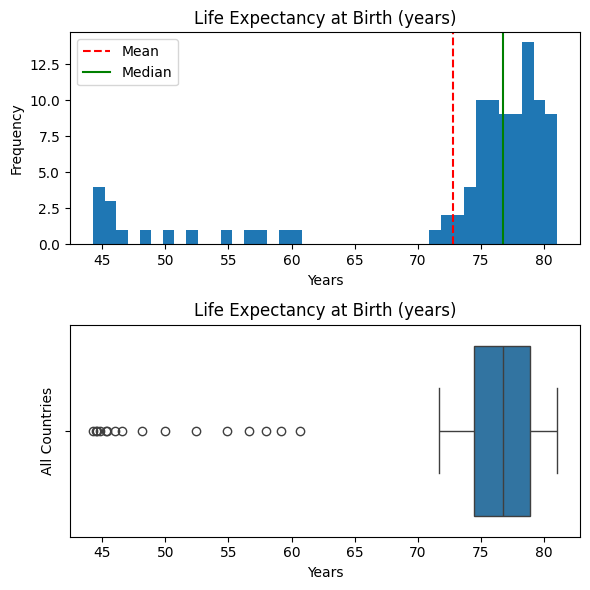

Mean: 72.8 years.
Median: 76.8 years.


In [91]:
# Create a figure and two subplots (axes)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Plot histogram of life expectancy on the first axis
ax1.hist(df['Life expectancy at birth (years)'], bins=40)
life_mean = np.mean(df['Life expectancy at birth (years)'])
life_median = np.median(df['Life expectancy at birth (years)'])
ax1.axvline(life_mean, color='r', linestyle='--', label='Mean')
ax1.axvline(life_median, color='g', linestyle='-', label='Median')
ax1.legend()
ax1.set_title('Life Expectancy at Birth Distribution')
ax1.set_xlabel('Years')
ax1.set_ylabel('Frequency')

# Boxplot on the second axis, plotted horizontally
sns.boxplot(x='Life expectancy at birth (years)', data=df)
ax2.set_title('Life Expectancy at Birth Boxplot')
ax2.set_ylabel('All Countries')
ax2.set_xlabel('Years')

# Show the plots
plt.tight_layout()
plt.show()

# Print the mean and median of life expectancy
print(f'Mean: {life_mean:.1f} years.')
print(f'Median: {life_median:.1f} years.')

There are a significant number of outliers below the lower bound i.e. less than Q1 - 1.5 * IQR. This is quantified as follows:

In [92]:
# 'Life expectancy at birth (years)' is the column of interest
life = df['Life expectancy at birth (years)']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
life_Q1 = life.quantile(0.25)
life_Q3 = life.quantile(0.75)

# Calculate IQR
life_IQR = life_Q3 - life_Q1

# Determine the lower and upper bounds for outliers
life_lower_bound = life_Q1 - 1.5 * life_IQR

# Count the number of outliers
life_outliers_below = life[life < life_lower_bound].count()

# Print lower bound and number of outliers below the lower bound
print(f"Lower bound: {life_lower_bound:.1f} years.")
print(f"Number of outliers below the lower bound: {life_outliers_below} observations.")

# Print Q1 and Q3
print(f"Q1: {life_Q1:.1f} years.")
print(f"Q3: {life_Q3:.1f} years.")

Lower bound: 67.8 years.
Number of outliers below the lower bound: 16 observations.
Q1: 74.5 years.
Q3: 78.9 years.


Initial remarks on life expectancy:
- Half the observations have a life expectancy between 75 and 79 years i.e. the interquartile range.
- 16 out of 96 (17%) observations are outliers, and all are below the lower bound of 67.8 years. This could be due to the discrepancies between individual countries, and will be further investigated in the next section.
- The data is negatively-skewed (left tail), with the **mean** life expectancy (~73 years) being **lower** than the **median** life expectancy (~77 years).

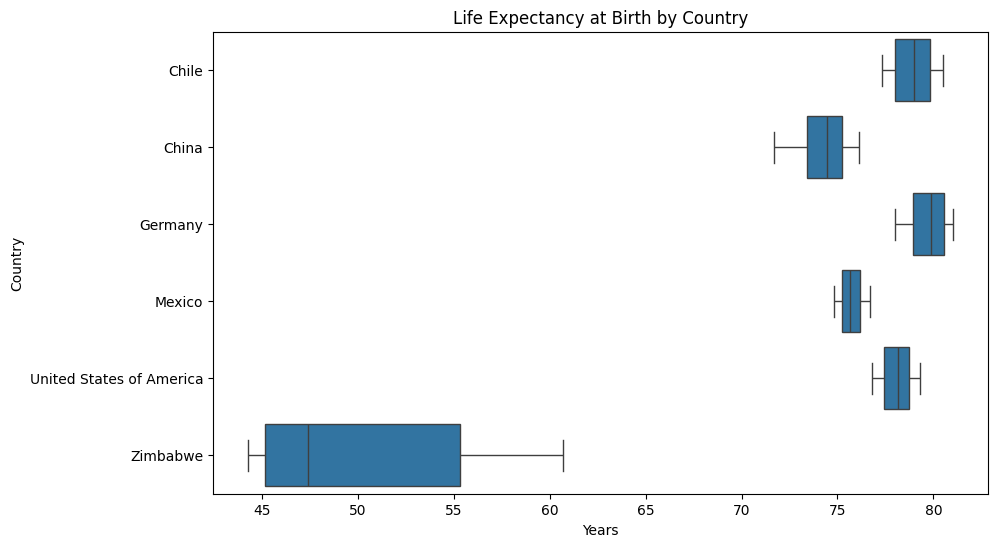

Median life expectancy at birth (years) for:
Germany: 79.8
Chile: 79.0
United States of America: 78.2
Mexico: 75.7
China: 74.5
Zimbabwe: 47.4


In [123]:
# Boxplots for 'Life expectancy at birth (years)' by 'Country'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Life expectancy at birth (years)', y='Country', data=df)
plt.title('Life Expectancy at Birth by Country')
plt.xlabel('Years')
plt.ylabel('Country')

# Median Life expectancy at birth (years) per country
life_median_usa = df[df['Country'] == 'United States of America']['Life expectancy at birth (years)'].median()
life_median_china = df[df['Country'] == 'China']['Life expectancy at birth (years)'].median()
life_median_germany = df[df['Country'] == 'Germany']['Life expectancy at birth (years)'].median()
life_median_mexico = df[df['Country'] == 'Mexico']['Life expectancy at birth (years)'].median()
life_median_chile = df[df['Country'] == 'Chile']['Life expectancy at birth (years)'].median()
life_median_zimbabwe = df[df['Country'] == 'Zimbabwe']['Life expectancy at birth (years)'].median()

plt.show()

# Print the median life expectancy at birth for each country, in descending order
print("Median life expectancy at birth (years) for:")
print(f"Germany: {life_median_germany:.1f}")
print(f"Chile: {life_median_chile:.1f}")
print(f"United States of America: {life_median_usa:.1f}")
print(f"Mexico: {life_median_mexico:.1f}")
print(f"China: {life_median_china:.1f}")
print(f"Zimbabwe: {life_median_zimbabwe:.1f}")

This plot shows that Germany has the longest life expectancy, followed by Chile, China, Mexico, the United States, and Zimbabwe. Zimbabwe's observations appear on the previous boxplot as outliers because they are significantly lower than the other countries in the dataset. Zimbabwe's median life expectancy (~47 years) is around 30 years lower than the next lowest country in the dataset (China).

## GDP

To help visualise the dataset metrics, boxplots and histograms are used to show the distribution of GDP across all countries in the dataset. These plots are stacked vertically to allow for easy comparison.

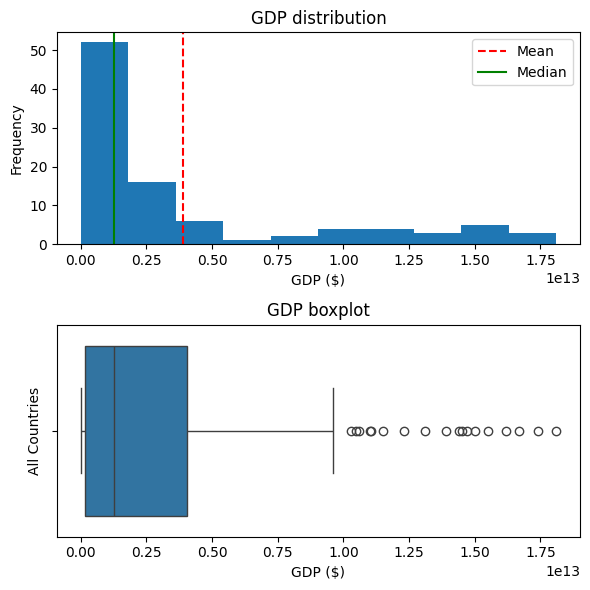

Mean: 3.88E+12.
Median: 1.28E+12.


In [95]:
# Create a figure and two subplots (axes)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Plot histogram of life expectancy on the first axis
ax1.hist(df['GDP'])
gdp_mean = np.mean(df['GDP'])
gdp_median = np.median(df['GDP'])
ax1.axvline(gdp_mean, color='r', linestyle='--', label='Mean')
ax1.axvline(gdp_median, color='g', linestyle='-', label='Median')
ax1.legend()
ax1.set_title('GDP distribution')
ax1.set_xlabel('GDP ($)')
ax1.set_ylabel('Frequency')

# Boxplot on the second axis, plotted horizontally
sns.boxplot(x='GDP', data=df)
ax2.set_title('GDP boxplot')
ax2.set_ylabel('All Countries')
ax2.set_xlabel('GDP ($)')

# Show the plots
plt.tight_layout()
plt.show()

# Print the mean and median of GDP
print(f'Mean: {gdp_mean:.2E}.')
print(f'Median: {gdp_median:.2E}.')

There are a significant number of outliers above the upper bound i.e. more than Q3 + 1.5 * IQR. This is quantified as follows:

In [74]:
# 'GDP' is the column of interest
gdp = df['GDP']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
gdp_Q1 = gdp.quantile(0.25)
gdp_Q3 = gdp.quantile(0.75)

# Calculate IQR
gdp_IQR = gdp_Q3 - gdp_Q1

# Determine the upper bound for outliers
gdp_upper_bound = gdp_Q3 + 1.5 * gdp_IQR

# Count the number of outliers
gdp_outliers_above = gdp[gdp > gdp_upper_bound].count()

# Print upper bound and number of outliers above the upper bound
print(f"Upper bound: $ {gdp_upper_bound:.2E}.")
print(f"Number of outliers above the upper bound: {gdp_outliers_above} observations.")

# print Q1 and Q3
print(f"Q1: {gdp_Q1:.2E}")
print(f"Q3: {gdp_Q3:.2E}")

Upper bound: $ 9.91E+12.
Number of outliers above the upper bound: 18 observations.
Q1: 1.73E+11
Q3: 4.07E+12


Initial remarks on GDP:
- Half the observations have a GDP between $1.73E+11 and $4.07E+12 i.e. the interquartile range.
- 18 out of 96 (19%) observations are outliers, and all are above the upper bound of $9.91E+12. This could be due to the discrepancies between individual countries, and will be further investigated in the next section.
- The data is positively-skewed (right tail), with the **mean** life expectancy ($3.88E+12) being **more** than the **median** life expectancy ($1.28E+12).

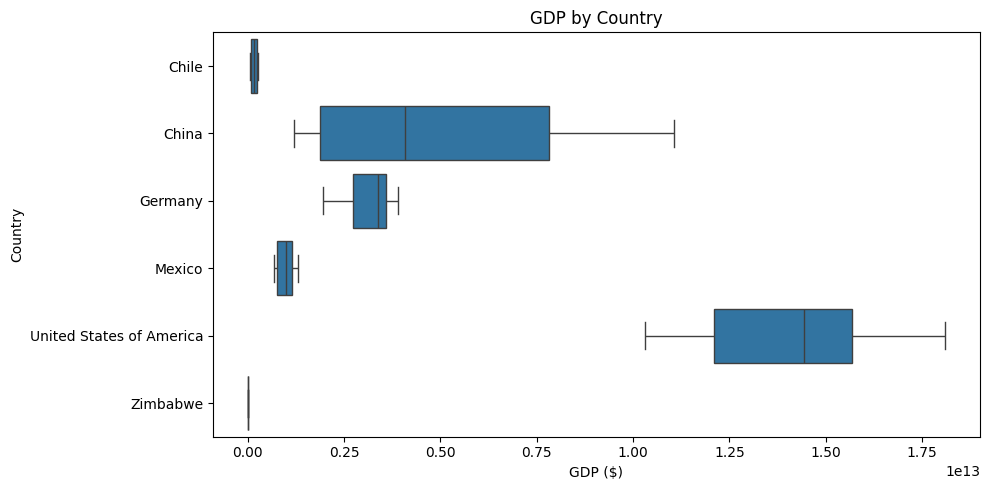

USA median GDP: $ 1.44E+13
China median GDP: $ 4.08E+12
Germany median GDP: $ 3.40E+12
Mexico median GDP: $ 1.00E+12
Chile median GDP: $ 1.73E+11
Zimbabwe median GDP: $ 6.73E+09


In [121]:
# Boxplots of GDP by country

# Create a figure and axis
plt.figure(figsize=(10, 5))

# Create a boxplot of GDP by country
sns.boxplot(x='GDP', y='Country', data=df)
plt.title('GDP by Country')
plt.ylabel('Country')
plt.xlabel('GDP ($)')

# Median GDP per country
gdp_median_usa = df[df['Country'] == 'United States of America']['GDP'].median()
gdp_median_china = df[df['Country'] == 'China']['GDP'].median()
gdp_median_germany = df[df['Country'] == 'Germany']['GDP'].median()
gdp_median_mexico = df[df['Country'] == 'Mexico']['GDP'].median()
gdp_median_chile = df[df['Country'] == 'Chile']['GDP'].median()
gdp_median_zimbabwe = df[df['Country'] == 'Zimbabwe']['GDP'].median()

# Show the plot
plt.tight_layout()
plt.show()

# print the median GDP for each country in descending order
print(f"USA median GDP: $ {gdp_median_usa:.2E}")
print(f"China median GDP: $ {gdp_median_china:.2E}")
print(f"Germany median GDP: $ {gdp_median_germany:.2E}")
print(f"Mexico median GDP: $ {gdp_median_mexico:.2E}")
print(f"Chile median GDP: $ {gdp_median_chile:.2E}")
print(f"Zimbabwe median GDP: $ {gdp_median_zimbabwe:.2E}")

This plot shows that the USA has the highest GDP, followed by China, Germany, Mexico, Chile, and Zimbabwe. USA's observations appear on the previous boxplot as outliers because they are significantly higher than the other countries in the dataset. The USA's median GDP (~1.4E+13) is around 3.5x higher than the next highest median, China (~4.1E+12).

# Explaining the Data

### How has GDP and life expectancy changed over time for the countries in the dataset?

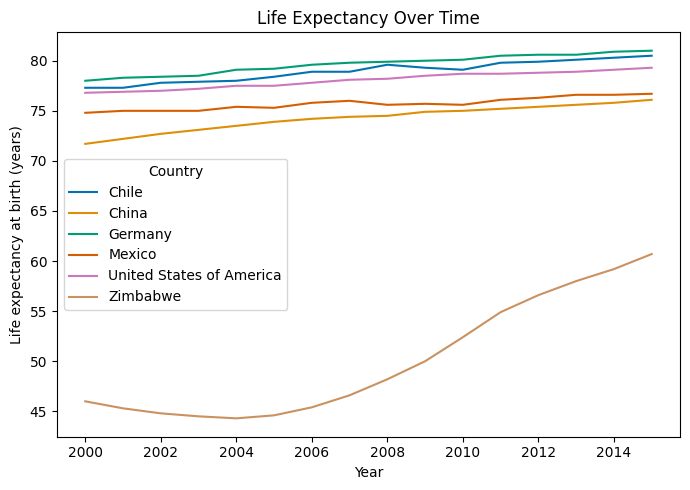

In [210]:
# Create a line plot of life expectancy over time
plt.figure(figsize=(7, 5))
sns.lineplot(x='Year', y='Life expectancy at birth (years)', hue='Country', data=df, palette='colorblind')
plt.title('Life Expectancy Over Time')
plt.ylabel('Life expectancy at birth (years)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

The life expectancy for all countries increased over time with the exception of Zimbabwe, which experienced a decline in life expectancy from 2000 to 2004, linked to their high rates of [HIV/AIDS](https://www.bbc.com/news/world-africa-42013720). However, since 2004 life expectancy rose to around 60 years in 2015, which was still 16 years lower than the next lowest country in the dataset (China).

### Are all countries **increasing** their GDP and life expectancy or are some countries experiencing a **decline** in one or both indicators?

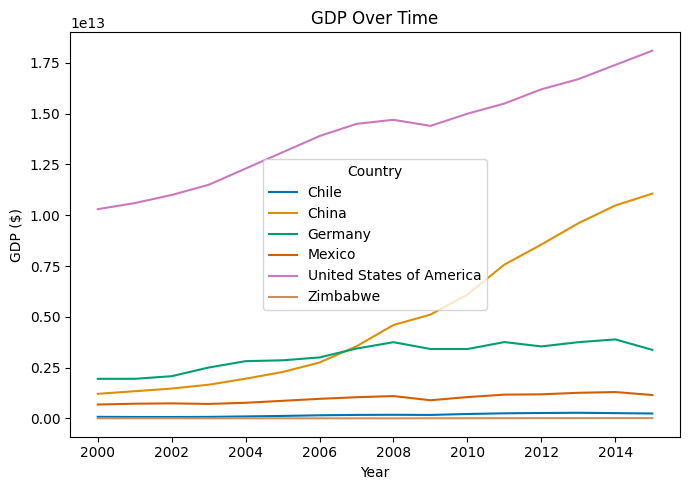

In [219]:
# Create a line plot of GDP over time
plt.figure(figsize=(7, 5))
sns.lineplot(x='Year', y='GDP', hue='Country', data=df)
sns.set_palette('colorblind')
plt.title('GDP Over Time')
plt.ylabel('GDP ($)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

GDP for USA, China and Germany has been increasing over time. GDP for Mexico, Chile and Zimbabwe is difficult to guage due to the scale, so the following plot shows the GDP growth rate for each country.

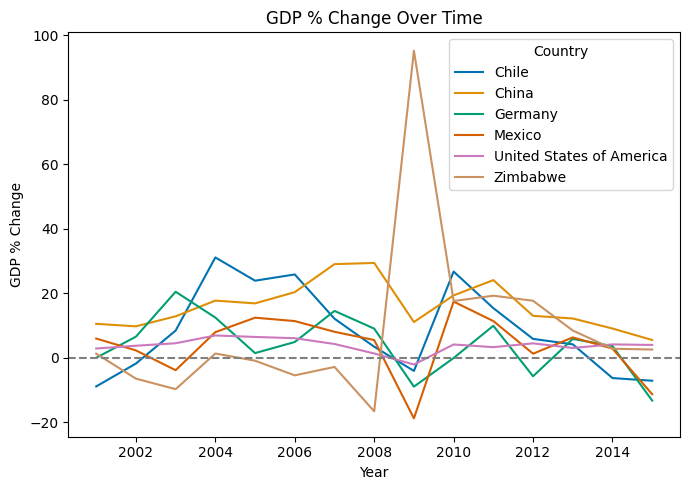

In [218]:
# Create a new figure
plt.figure(figsize=(7, 5))
sns.set_palette('colorblind')

# Loop through each country and plot the GDP % change
for country in df['Country'].unique():
    country_df = df[df['Country'] == country].copy()  # Use .copy() to avoid SettingWithCopyWarning
    country_df['GDP % change'] = country_df['GDP'].pct_change() * 100
    sns.lineplot(x='Year', y='GDP % change', data=country_df, label=country)

# Set the title and labels
plt.title('GDP % Change Over Time')
plt.ylabel('GDP % Change')
plt.xlabel('Year')

# add horizontal line at 0
plt.axhline(0, color='grey', linestyle='--')

# Add the legend
plt.legend(title='Country')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Only China has enjoyed a positive growth rate in GDP over the whole 16-year period. The other countries have experienced years where GDP has declined, but the overall trend is positive for all. Zimbabwe has experienced the most volatile GDP growth rate, with a significant increase in 2009, which coincides with them [adopting the US dollar](https://www.bbc.com/news/world-africa-42013720) as their official currency.

### What is the **correlation** between GDP and life expectancy of a country?

One measure of correlation is the Pearson correlation coefficient, which ranges from -1 to 1. A value of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. It assumes that the relationship between the two variables is linear.

In [179]:
# Calculate and print the Pearson correlation coefficient between 'GDP' and 'Life expectancy at birth (years)'
pearson_corr = df['GDP'].corr(df['Life expectancy at birth (years)'])
print(f"Pearson correlation coefficient: {pearson_corr:.2f}")

Pearson correlation coefficient: 0.34


The Pearson correlation coefficient between GDP and life expectancy is 0.34, which suggests a weak positive linear relationship between the two variables across all the countries and 16 years in the dataset.

If we create plots for every year for life expectancy vs GDP, we can see that over time, the gradient of the line of best fit is decreasing, which may suggest that the correlation between GDP and life expectancy is decreasing over time.

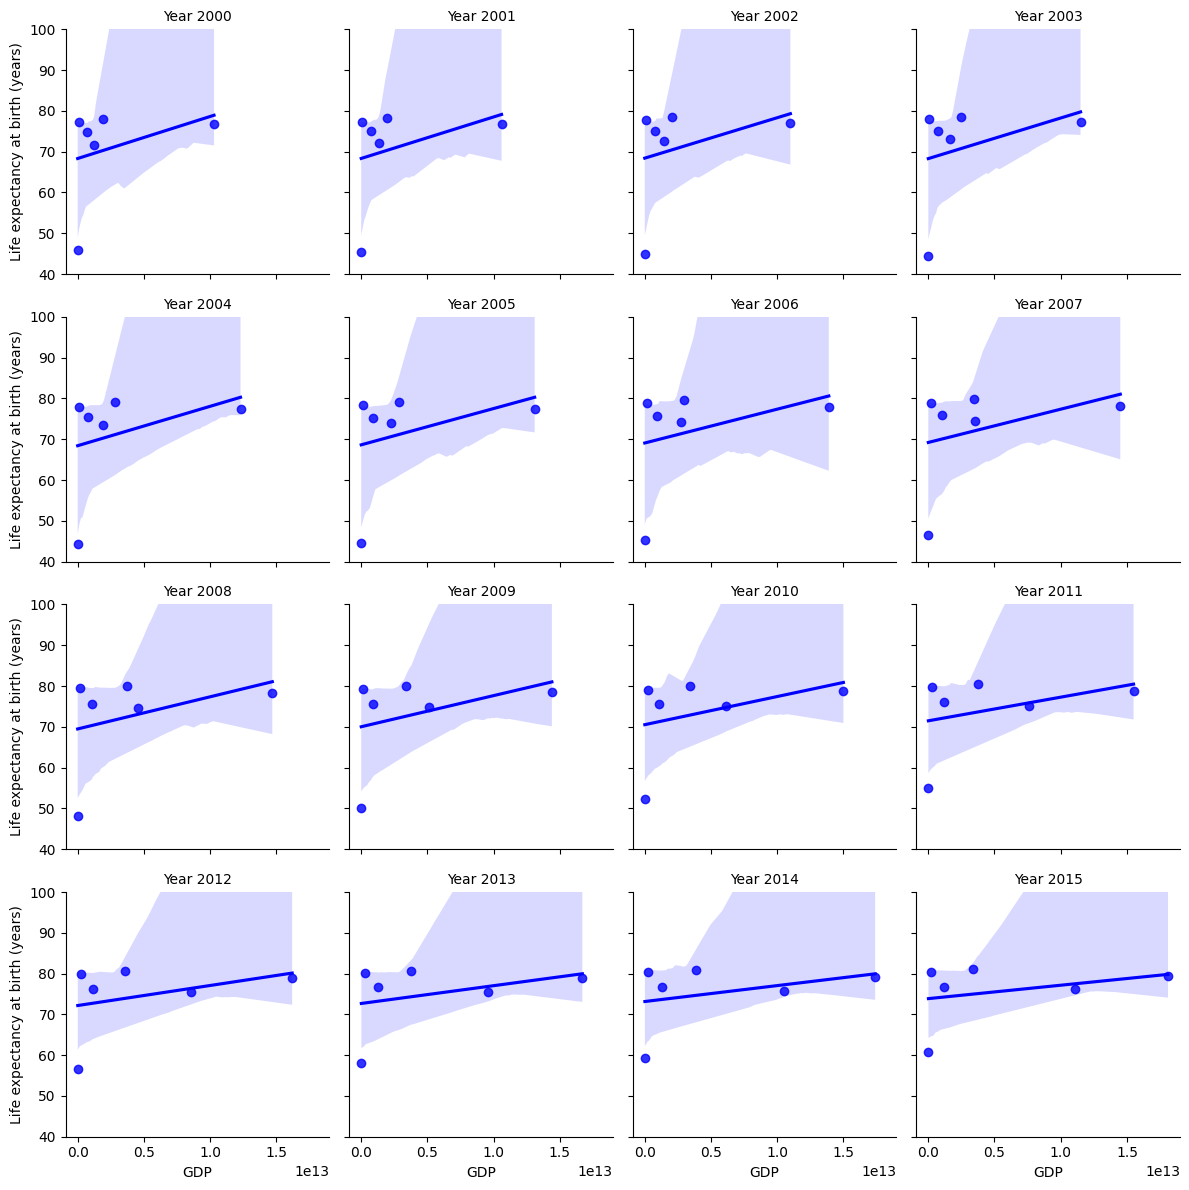

In [173]:
# Create the FacetGrid
g = sns.FacetGrid(df, col='Year', col_wrap=4, height=3)

# Map the regplot to the grid
g.map(sns.regplot, 'GDP', 'Life expectancy at birth (years)', color='b')

# Set titles for each subplot
g.set_titles('Year {col_name}')

# Iterate over each axis and set the y-axis limits based on the data for each year
for ax in g.axes.flat:
    year = int(ax.get_title().split()[-1])
    year_data = df[df['Year'] == year]
    ax.set_ylim(40, 100)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Note: the confidence intervals for the regression lines suggest a significant amount of uncertainty in the relationship between GDP and life expectancy, which is likely due to the small sample size of 6 countries.

In [186]:
# Calculating and printing the Pearson correlation coefficient between 'GDP' and 'Life expectancy at birth (years)' for each year
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    pearson_corr = year_data['GDP'].corr(year_data['Life expectancy at birth (years)'])
    print(f"Pearson correlation coefficient for {year}: {pearson_corr:.2f}")


Pearson correlation coefficient for 2000: 0.33
Pearson correlation coefficient for 2001: 0.33
Pearson correlation coefficient for 2002: 0.32
Pearson correlation coefficient for 2003: 0.33
Pearson correlation coefficient for 2004: 0.34
Pearson correlation coefficient for 2005: 0.33
Pearson correlation coefficient for 2006: 0.33
Pearson correlation coefficient for 2007: 0.35
Pearson correlation coefficient for 2008: 0.36
Pearson correlation coefficient for 2009: 0.36
Pearson correlation coefficient for 2010: 0.38
Pearson correlation coefficient for 2011: 0.36
Pearson correlation coefficient for 2012: 0.35
Pearson correlation coefficient for 2013: 0.34
Pearson correlation coefficient for 2014: 0.33
Pearson correlation coefficient for 2015: 0.32


Over the 16 years of data collection (2000-2015), the correlation between GDP and life expectancy fluctuates between 0.32 and 0.38, which suggests a weak positive linear relationship between the two variables.

# Conclusions

Using a range of tools (boxplots, histograms, scatter plots, and the Pearson correlation coefficient), it is possible to explore the relationship between GDP and life expectancy for 6 countries over 16 years. Generally, life expectancy and GDP has increased over time for all countries, suggesting a positive correlation between these two variables. However, this correlation was quantified and found to be positive but weak, meaning it is not possible to say that one causes the other with any certainty.

The uncertainty was likely due to a relatively small dataset. Moreover, the dataset includes observations from Zimbabwe at a particularly volatile time in their history with regards to their life expectancy (driven largely by the HIV/Aids epidemic) and GDP (due to the adoption of the US dollar as their official currency). This could have skewed the results and made it difficult to draw meaningful conclusions.

# Blog Post